<a href="https://colab.research.google.com/github/TobiasLaimer/ColabStuff/blob/master/ps1_ex2_subm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

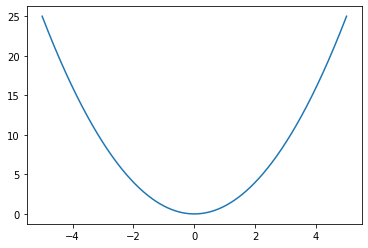

In [3]:
#2.1  "Plot f (x) = x2 for the interval (−5, 5)"

x= np.linspace(-5, 5, 1000) #get an array of 1000 equidistant values from the interval (−5, 5)
y= x**2
plt.plot (x,y) #plot f(x)

In [0]:
#2.2 "Generate a dataset of 100 points drawn at random from a 2D Gaussian with mean (1, 0.5) and standard deviation (0.4, 0.4)"

N=100 #our sample size
mean = [1, 0.5]
std = [0.4, 0.4] #parametrize 2D Gaussian with mean (1, 0.5) and standard deviation (0.4, 0.4)- easy to change our parameters for the generation of data points later if we like
x = np.random.normal(mean[0], std[0], N) #get x data points, Python starts counting with 0
y = np.random.normal (mean[1], std[1], N) #get y data points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


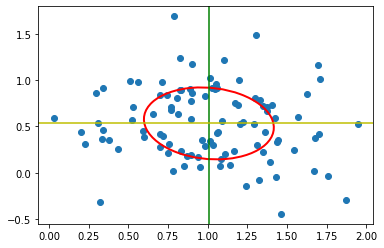

1.0078542579966996 0.40742567329397095 0.5331515522027491 0.3859526627887832 0.68  should be close to [1, 0.4, 0.5, 0.4, 0.68]


In [44]:
#2.3 "Now, highlight the mean and 1-σ contour lines in a plot with your data points"

#means
plt.axvline(x.mean(), color='g') #plot mean of x
plt.axhline(y.mean(), color='y') #plot mean of y. use different colors to minimise confusion

#1-sigma ellipse
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

nstd = 1 #number of standard deviations
ax = plt.subplot(111) #1x1 grid, first subplot

cov = np.cov(x, y)
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='red', linewidth=2.0)
ell.set_facecolor('none')
ax.add_artist(ell)


plt.scatter(x, y) #now plot x,y and ell
plt.show() #we see that there are considerably less than 68% of our sample inside the ellipse. This is expected since we were supposed to draw a 1-sigma error ellipse, not a confidence ellipse!


#now, sanity checks:

#did we really get good Gaussians?
i=k=0
for i in range(0,N):
  if x.mean()-x.std()<x[i]<x.mean()+x.std():
    k+=1
  i+=1
dev_1s= k/N #68% of the data points should be within one std of the mean- of course there is noise with only 100 data points.

print (x.mean(), x.std(), y.mean(), y.std(), dev_1s, " should be close to [1, 0.4, 0.5, 0.4, 0.68]") #data are close to our specified Gaussian- of course there is noise with only 100 data points.

#/end